In [ ]:
%%capture
!pip install rdkit

In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem


Fala galera!

Meu nome é Victória e sejam bem-vindos ao canal do Youtube da for_code! Nós somos a liga de computação da Escola de Química da UFRJ e esse vídeo faz parte de uma Playlist sobre a biblioteca RDKit, de química orgânica.

Já ouviu falar de impressão digital das moléculas? Não? Então bora aprender!

# Fingerprint

O RDKit possui uma variedade de funcionalidades integradas para gerar impressões digitais moleculares e usá-las para calcular a similaridade entre moléculas.

A maneira mais fácil de obter essas impressões digitais é criando um **objeto FingeprintGenerator** para o tipo de impressão digital do seu interesse e usá-lo para calcular as impressões digitais.

As gerações de impressão digital permitidas são:

* bit vectors : fpgen.GetFingerprint

* sparse (unfolded) bit vectors : fpgen.GetSparseFingerprint

* count vectors : fpgen.GetCountFingerprint

* sparse (unfolded) count vectors : fpgen.GetSparseCountFingerprint


As métricas de similaridade disponíveis incluem Tanimoto, Dice, Cosine, Sokal, Russel, Kulczynski, McConnaughey e Tversky.
O conjunto padrão de parâmetros usados pelo impressor digital é:

* tamanho mínimo do caminho: 1 título

* tamanho máximo do caminho: 7 ligações

* tamanho da impressão digital: 2048 bits

* número de bits definidos por hash: 2

Nós podemos controlá-los usando AllChem.GetRDKitFPGenerator()

In [ ]:
from rdkit import DataStructs
ms = [Chem.MolFromSmiles('CCOC'), Chem.MolFromSmiles('CCO'),
Chem.MolFromSmiles('COC')]
fpgen = AllChem.GetRDKitFPGenerator()
fps = [fpgen.GetFingerprint(x) for x in ms]
DataStructs.TanimotoSimilarity(fps[0],fps[1])


0.6

In [ ]:
from rdkit import DataStructs
ms = [Chem.MolFromSmiles('CCOC'), Chem.MolFromSmiles('CCO'),
Chem.MolFromSmiles('COC')]
fpgen = AllChem.GetRDKitFPGenerator()
fps = [fpgen.GetFingerprint(x) for x in ms]
DataStructs.TanimotoSimilarity(fps[0],fps[2])


0.4

# Impressões digitais de Morgan
Esta família de impressões digitais, mais conhecida como impressões digitais circulares 5, é construída aplicando o algoritmo Morgan a um conjunto de invariantes de átomos fornecidos pelo usuário. Ao gerar impressões digitais Morgan, o raio da impressão digital também pode ser fornecido (o padrão é 3)

In [ ]:
from rdkit.Chem import AllChem
fpgen = AllChem.GetMorganGenerator(radius=2)
m1 = Chem.MolFromSmiles('Cc1ccccc1')
fp1 = fpgen.GetSparseCountFingerprint(m1)
fp1
m2 = Chem.MolFromSmiles('Cc1ncccc1')
fp2 = fpgen.GetSparseCountFingerprint(m2)
DataStructs.DiceSimilarity(fp1,fp2)

0.55

As impressões digitais de Morgan, como pares de átomos e torções topológicas, são frequentemente usadas como contagens, mas também é possível calculá-las como vetores de bits, o tamanho padrão da impressão digital é 2.048 bits:

In [ ]:
fp1 = fpgen.GetFingerprint(m1)
fp1
#<rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x...>
len(fp1)
2048
fp2 = fpgen.GetFingerprint(m2)
DataStructs.DiceSimilarity(fp1,fp2)

# Gerando imagens de bits de impressão digital
Para os tipos de impressão digital Morgan e RDKit, é possível gerar imagens do ambiente atom que define o bit usando as funções **rdkit.Chem.Draw.DrawMorganBit() e rdkit.Chem.Draw.DrawRDKitBit()**

As cores de destaque padrão para os bits Morgan indicam:

* azul: o átomo central do meio ambiente

* amarelo: átomos aromáticos

* cinza: átomos do anel alifático

As cores de destaque padrão para os bits do RDKit indicam:

* amarelo: átomos aromáticos

# Mapas de Similaridade

Os Mapas de similaridade são uma forma de visualizar as contribuições atômicas para a similaridade entre uma molécula e uma molécula de referência.

Começamos criando duas moléculas:

In [ ]:
from rdkit import Chem
mol = Chem.MolFromSmiles('COc1cccc2cc(C(=O)NCCCCN3CCN(c4cccc5nccnc54)CC3)oc21')
refmol = Chem.MolFromSmiles('CCCN(CCCCN1CCN(c2ccccc2OC)CC1)Cc1ccc2ccccc2c1')

In [ ]:
from rdkit.Chem import Draw
from rdkit.Chem.Draw import SimilarityMaps
fp = SimilarityMaps.GetAPFingerprint(mol, fpType='normal')
fp = SimilarityMaps.GetTTFingerprint(mol, fpType='normal')
fp = SimilarityMaps.GetMorganFingerprint(mol, fpType='bv')

A função que gera um mapa de similaridade para duas impressões digitais requer a especificação da função de impressão digital e, opcionalmente, da métrica de similaridade. O padrão para este último é a similaridade de dados. Usando todos os argumentos padrão da função de impressão digital do Morgan, o mapa de similaridade pode ser gerado assim:

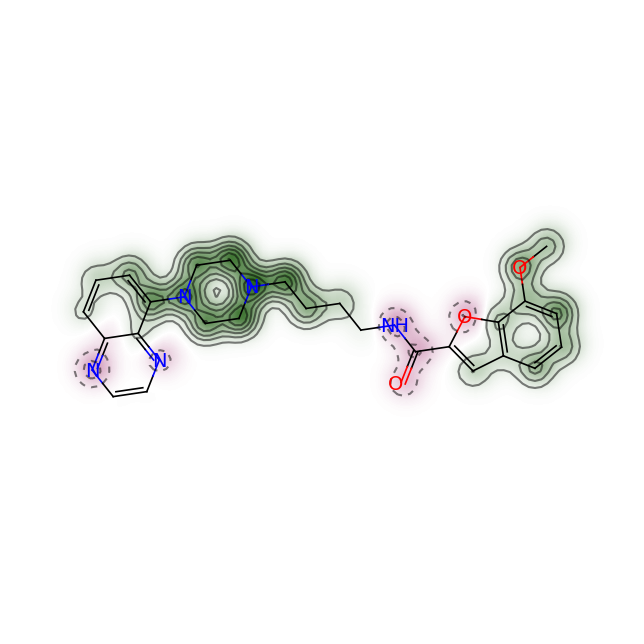

In [ ]:
fig, maxweight = SimilarityMaps.GetSimilarityMapForFingerprint(refmol, mol, SimilarityMaps.GetMorganFingerprint)
